In [1]:
import requests;                                 # import package used to downlaod data from a web URL
import json;
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib;
import datetime as dt
import time
import numpy as np

from pandas.io.json import json_normalize

matplotlib.style.use('ggplot');
%matplotlib inline

In [2]:
dfIn = pd.read_csv('itemhistory.csv', dtype={'Craft':str, 'DateTime':dt.datetime, 'DefIndex':np.float64, 'Name':str,
                                            'PriceIndex':str, 'QualInt':np.int64, 'Trade':str, 'currency':str,
                                            'timestamp':np.float64, 'value':np.float64, 'value_high':np.float64})
dfIn['DateTime'] = pd.to_datetime(dfIn['DateTime'])
dfIn = dfIn.set_index(['Name', 'DefIndex', 'QualInt', 'Trade', 'Craft', 'PriceIndex'])
dfIn.sort_index(inplace = True)
df2 = dfIn.reset_index()

In [3]:
df2.head(10)

,Name,DefIndex,QualInt,Trade,Craft,PriceIndex,timestamp,DateTime,currency,value,value_high
0,A Brush with Death,30186,6,Tradable,Craftable,0,1381676945,2013-10-13 15:09:05,keys,1.00,1.00
1,A Brush with Death,30186,6,Tradable,Craftable,0,1383401806,2013-11-02 14:16:46,metal,5.66,6.00
2,A Brush with Death,30186,6,Tradable,Craftable,0,1383665506,2013-11-05 15:31:46,metal,5.33,6.00
3,A Brush with Death,30186,6,Tradable,Craftable,0,1383798437,2013-11-07 04:27:17,metal,5.00,5.33
4,A Brush with Death,30186,6,Tradable,Craftable,0,1383859373,2013-11-07 21:22:53,metal,4.66,5.00
5,A Brush with Death,30186,6,Tradable,Craftable,0,1384015717,2013-11-09 16:48:37,metal,4.66,4.66
6,A Brush with Death,30186,6,Tradable,Craftable,0,1384161954,2013-11-11 09:25:54,metal,4.33,4.66
7,A Brush with Death,30186,6,Tradable,Craftable,0,1384383384,2013-11-13 22:56:24,metal,4.00,4.33
8,A Brush with Death,30186,6,Tradable,Craftable,0,1384656665,2013-11-17 02:51:05,metal,4.00,4.00
9,A Brush with Death,30186,6,Tradable,Craftable,0,1398733640,2014-04-29 01:07:20,metal,3.66,4.00


In [4]:
item_counts=df2['Name'].value_counts()
item_counts

Earbuds                                             468
Team Captain                                        418
Villain's Veil                                      400
Stainless Pot                                       391
Exquisite Rack                                      389
El Jefe                                             384
Master's Yellow Belt                                376
Mann Co. Supply Crate                               375
Bonk Boy                                            374
Glengarry Bonnet                                    363
Détective Noir                                      342
Frenchman's Beret                                   337
Le Party Phantom                                    334
Prince Tavish's Crown                               325
Archimedes                                          318
Magistrate's Mullet                                 316
Pyromancer's Mask                                   312
Vintage Tyrolean                                

In [5]:
count = 0
mostPopular = []
for key, value in item_counts.iteritems():
    if count == 5:
        break
    mostPopular.append(key)
    count = count + 1

In [6]:
#mostPopular.remove('D\xc3\xa9tective Noir')
mostPopular

['Earbuds',
 'Team Captain',
 "Villain's Veil",
 'Stainless Pot',
 'Exquisite Rack']

In [7]:
df5 = df2.query("Name in @mostPopular")

In [8]:
df5

,Name,DefIndex,QualInt,Trade,Craft,PriceIndex,timestamp,DateTime,currency,value,value_high
16493,Earbuds,143,3,Tradable,Craftable,0,1344609983,2012-08-10 14:46:23,keys,26.00,26.00
16494,Earbuds,143,3,Tradable,Craftable,0,1348437742,2012-09-23 22:02:22,keys,26.00,27.00
16495,Earbuds,143,3,Tradable,Craftable,0,1349211782,2012-10-02 21:03:02,keys,26.00,28.00
16496,Earbuds,143,3,Tradable,Craftable,0,1349910349,2012-10-10 23:05:49,keys,27.00,28.00
16497,Earbuds,143,3,Tradable,Craftable,0,1350397427,2012-10-16 14:23:47,keys,28.00,28.00
16498,Earbuds,143,3,Tradable,Craftable,0,1351094332,2012-10-24 15:58:52,keys,28.00,29.00
16499,Earbuds,143,3,Tradable,Craftable,0,1351397884,2012-10-28 04:18:04,keys,27.00,28.00
16500,Earbuds,143,3,Tradable,Craftable,0,1351560181,2012-10-30 01:23:01,keys,26.00,27.00
16501,Earbuds,143,3,Tradable,Craftable,0,1351820834,2012-11-02 01:47:14,keys,25.00,26.00
16502,Earbuds,143,3,Tradable,Craftable,0,1352839410,2012-11-13 20:43:30,keys,26.00,26.00


In [9]:
df5.plot(x=df5['DateTime'], y=df5['value'])

KeyError: '[ 26.   26.   26.  ...,   3.4   3.6   4. ] not in index'

Earbuds
3
6
Team Captain
5
6
Villain's Veil
5
6
11
Stainless Pot
1
3
5
6
14
Exquisite Rack
5
6
14


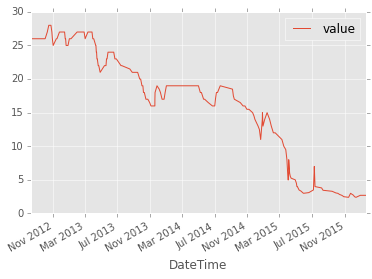

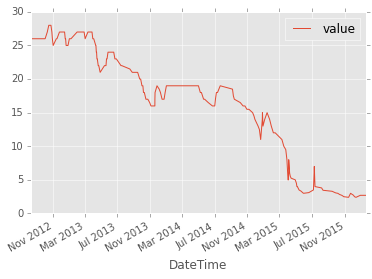

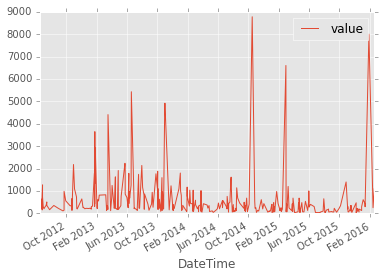

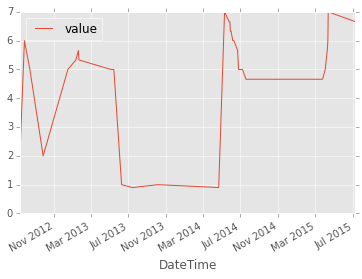

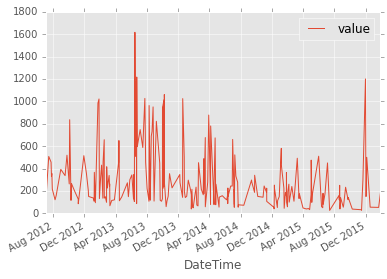

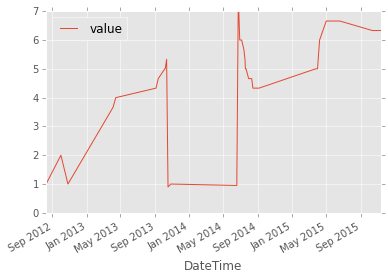

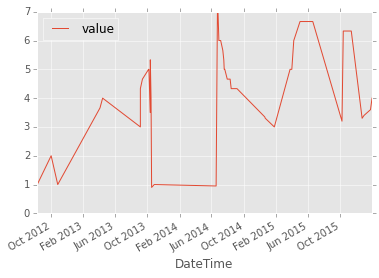

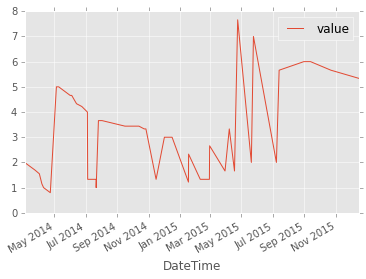

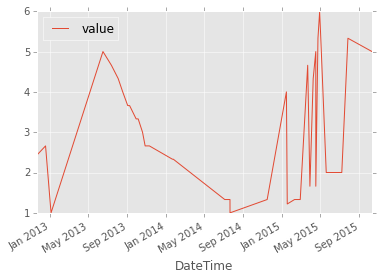

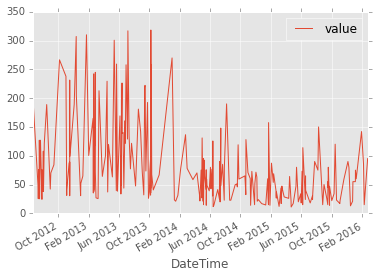

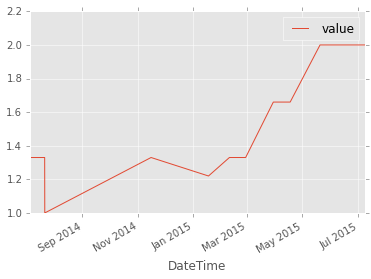

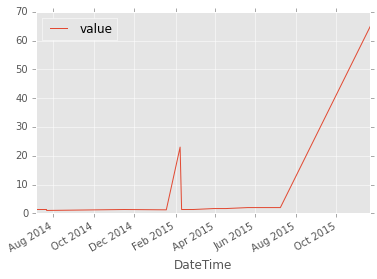

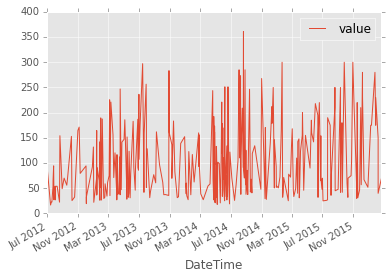

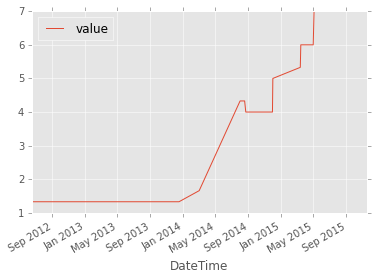

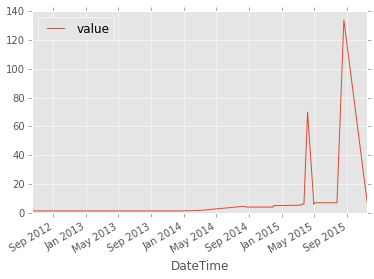

In [10]:
for item in mostPopular:
    plot1 = df5[df5.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    print item
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        print quality
        plot2.plot('DateTime','value')